<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
# for reading csv in Colab
# from google.colab import files
# uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
# uploaded = files.upload()
from sklearn.feature_extraction import text 


/tmp/ipykernel_48845/2385415252.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100
df = pd.read_csv("../horoscope_saved.csv")
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

In [4]:
scorpio_raw = ["Scorpio’s archetypal traits are derived from its receptive, feminine, or yin qualities, making this sign oriented toward contemplation and engagement with inner awareness. Alive in both a Scorpio woman or Scorpio man, those born with the Scorpion as their rising, sun, or moon sign have a mysterious, intuitive, and power-wielding dynamic in the core of their personality, an echo of the shadowy Autumn season. As a fixed sign, Scorpio holds the qualities of being a sustainer, being able to apply profound powers of concentration to projects, and discovering hidden truths. As a result, those with the sign of the Scorpion prominent in their charts tend to be magnetic, highly sensitive, intuitive, creative, and secretive at times. The primary Scorpio strengths can be found in their devoted, determined, and observant natures. They are hard workers, often artistic, and deeply committed to study and research. You can count on the Scorpion to see whatever they have committed to through to the end. Scorpios tend to be receptive and patient, letting others play their cards and show their intentions first to better understand the emotional and psychological dynamics of their relationships. Magnetic and mysterious, Scorpio is drawn toward dark, taboo, or occult subjects, and are curious about the hidden facets of life that others may shy away from. The Scorpion tends to be fearless in the dark, avoided, and mysterious inner depths of the psyche, and potent realities of life like death and transformation. While Scorpio is often misunderstood and feared as an archetype, those born under this sign are very sensitive, empathetic, and can be quite compassionate. They passionately bond themselves, heart and soul, to those they care for. Once they feel they can trust, they are quite loyal to the friends and lovers that make it into their inner circle. Scorpio understands innately what it feels like to be the weirdo or the outsider, and they have a natural connection to the underdog or those who are deemed untouchable in society. Because of this, they are uniquely poised to be of great service to those in our society that suffer the most, like the homeless, the mentally ill, and people who have been outcast for divergent spiritual beliefs or lifestyles. Anyone with preferences that challenge conventional sexual, spiritual, and social ideas are potentially the Scorpion’s greatest allies and sources of affinity and acceptance. Scorpio can take emotional intelligence, understanding, and healing to the darkest circumstances, and may have had to overcome some healing or transformative experience of their own in their lives. Their fearless understanding of trauma, and survival, makes these folks the strongest psychic and spiritual warriors. Some potential weaknesses in the Scorpio archetype are rooted in their great strengths. Though they are determined and devoted to their work, they can become so rigid, fixated, and obsessed that it can be difficult to adapt to changes or to let go of an idea that is no longer useful. Those born under the sign of the Scorpion are receptive and patient, but they can be suspicious and slow to trust. Others may be forthcoming about their vulnerabilities, but if Scorpios are feeling insecure, they can use what others have revealed to be emotionally manipulative and controlling. Like the other fixed signs, they can be slow to forgive, and those that cross the Scorpion may feel their vengeful sting. Being naturally drawn to taboo and occult subjects can have the Scorpion inordinately focused on the dark side of life, giving them a pessimistic and nihilistic worldview. They may start seeking darker motives everywhere, which can lead to isolation and paranoia. It can then be hard to relax, trust, and enjoy life’s simple pleasures to stay in balance. Naturally sensitive and passionate, those born under the sign of the Scorpion give themselves heart and soul when seeking love and sexual connection, but if this isn’t reciprocated with the same intensity, they can become needy and obsessive with their lovers. Because of their co-relation with planet Pluto, Scorpios are often drawn to go beyond the fringes of society to seek thrill and adventure, yet this can easily lead the Scorpion into danger and self-destruction. Like a moth to a flame, they are lured toward intensity, but this may not always be in their best interest. Like all water signs, Scorpio is vulnerable to absorbing toxic energies, so if they are offering healing or counseling work, they need to have cleansing practices. Breathing exercises, saunas, smudging, and protective aura visualizations are all ways the Scorpio native can maintain psychic health. Scorpios may need to seek and maintain healing of their own before they engage in service work. Moon in Scorpio natives, especially, may have to work through dark moods and depression at times in their lives. Scorpio children will be well-nurtured if they are accepted unconditionally, and not shamed for having unique interests or big life questions. Acceptance at home may help offset a teenage Scorpio’s rebellion, and challenging artistic pursuits or martial arts may keep these fearless natives positively occupied."]

In [5]:
stop_words_scorpio = ['scorpio', 'scorpion', 'born', 'like', 'life', 'sign', 'scorpios']

In [6]:
with open ("../taurus_description.txt", "r") as taurus:
    taurus_raw = [taurus.read()]

In [7]:
stop_words_taurus = ['taurus',  'born', 'like', 'life', 'sign', 'bull', 'signs', 'earth', 'venus']

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


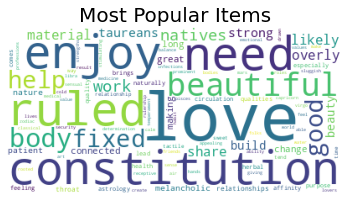

In [8]:
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_taurus)
vectorizer = TfidfVectorizer(stop_words=stop_words)
vecs = vectorizer.fit_transform(taurus_raw)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
cloud_df = pd.DataFrame(lst1, columns=feature_names)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(cloud_df.T.sum(axis=1))

plt.imshow(Cloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)
plt.show()

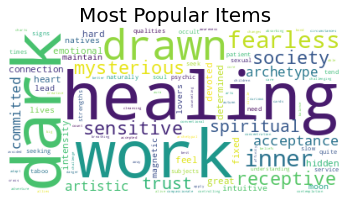

In [9]:
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_scorpio)
vectorizer = TfidfVectorizer(stop_words=stop_words)
vecs = vectorizer.fit_transform(scorpio_raw)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
cloud_df = pd.DataFrame(lst1, columns=feature_names)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(cloud_df.T.sum(axis=1))

plt.imshow(Cloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)
plt.show()

In [10]:
df.head()

,sign,category,date,horoscope
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'll be blessed with the ability to solve problems, and others will come looking for you today. You'll listen, understand, and express empathy. You'll be wise enough to find solutions to any issues they present to you. After a day like this, you might ask yourself if you shouldn't work as a therapist."
1,aries,general,20200618,"People will understand and appreciate your desire to stand out from the crowd today, Aries. This isn't a sign of arrogance on your part. It's just that you're particularly perceptive right now and people need your good advice. Since you're ready to step into the spotlight and shine like the stars that are giving you all this wonderful energy, go for it. You'd kick yourself if you let this opportunity pass."
2,aries,general,20200619,"You are very interested in technological breakthroughs and innovation, Aries, especially if it has some benefit for individuals. Since you also concern yourself with social issues and subjects like psychology and spiritual therapies, you realize the importance of progress in these areas for the future. You also wonder where you fit in."
3,aries,general,20200620,"Stress from overwork could have you feeling weaker than usual. You might be tempted to stay at home, get some rest, and recoup your energies. Do this if you can, Aries. Otherwise, you may not be able to give your project the concentration it needs, and therefore may not accomplish as much as you think you should. If you feel you can't stay home, try to work alone so you won't be distracted."
4,aries,general,20200621,"This is a good day to stand up for yourself and make it known that you aren't a pushover, Aries. Use the powerful energy of the day to follow through on projects that may have lost momentum. Pick up the reins and take control of the direction of your life. Feel free to be more aggressive than you normally would. Show others your incredible worth."


In [56]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_by_month(df, month, year, sign, category):
    analyzer = SentimentIntensityAnalyzer()
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    filtered_df = df[(df['sign'] == sign) & (df['category'] == category)]

    sentiment = []
    x = []
    for i in range(filtered_df['date'].size):
        sentiment.append(analyzer.polarity_scores(filtered_df[i:i+1]['horoscope'])['compound'])
        x.append(filtered_df[i:i+1]['formatted_date'].dt.day)

    plt.plot(x, sentiment)
    plt.xlabel("Date")
    plt.ylabel("Sentiment rating")
    plt.title(f"Sentiment for {sign} in {months[month-1]}, {year}")
    plt.show()


    # See high vs. low
    index_of_lowest_sentiment = np.argmin(np.array(sentiment))
    low_sent = str(filtered_df[index_of_lowest_sentiment:index_of_lowest_sentiment+1]['horoscope'])

    index_of_high_sentiment = np.argmax(np.array(sentiment))
    high_sent = str(filtered_df[index_of_high_sentiment:index_of_high_sentiment+1]['horoscope'])
    print(low_sent)
    print(high_sent)

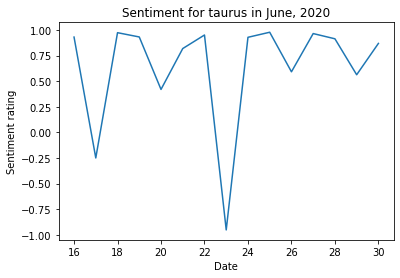

formatted_date
2020-06-23    You'll notice that your emotions are coming to a monthly climax today, Taurus. Don't be alarmed but do be cautious about lashing out at people for no reason. You may feel on edge. Unintended slights from others could push you over that edge in a fury of emotion. Harsh words spoken today can damage other people's feelings for a long time, so remain silent.
Name: horoscope, dtype: object
formatted_date
2020-06-25    The astral energy indicates positive financial news. A settlement, grant, or bonus of some kind that you've anticipated for a long time may finally manifest. You might want to celebrate, Taurus. A chance to attend a large gathering might come your way. Have fun. Tonight, don't be surprised if you have vivid dreams - some great, some sad. Keep paper and pen handy so you can write them down.
Name: horoscope, dtype: object


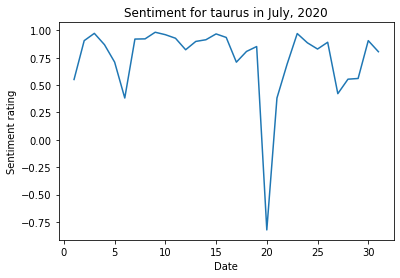

formatted_date
2020-07-20    Restlessness may plague you throughout the day, Taurus, because you could be brimming over with physical energy but have no outlet for it. You might have to stay in and wait for something important, which could prove frustrating. Put on an exercise video and do aerobics while you wait. This isn't a good day to start new projects. Limit your social interactions to exercising with others at the gym.
Name: horoscope, dtype: object
formatted_date
2020-07-09    You have an incredibly strong influence on others just by virtue of the fact of your fun-loving, peaceful, and harmonious nature, Taurus. Your natural charm will take you any place you want to go today, so feel free to use it at will. Accentuate the positive and make sure you're walking on the sunny side of the street. Whistle as you walk down the sidewalk and get out into the light.
Name: horoscope, dtype: object


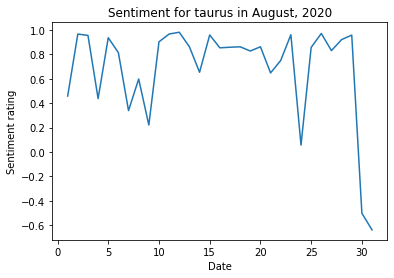

formatted_date
2020-08-31    You're less optimistic and energetic than usual, Taurus. Your mind feels sluggish - your whole body does, in fact. You're either coming down with the flu or completely and thoroughly disheartened. This would be a good day to take some time off. Issues from the past may come back to haunt you. Perhaps you should address them once and for all.
Name: horoscope, dtype: object
formatted_date
2020-08-12    Romance should be going beautifully for you today, Taurus. Your romantic partner looks especially attractive and probably is in a great mood. You might decide to attend a lecture together or plan a weekend getaway. Communication between you is open, honest, supportive, and loving. Don't let this day pass you by. Make sure you get together, if possible. This could end up being a day to remember.
Name: horoscope, dtype: object


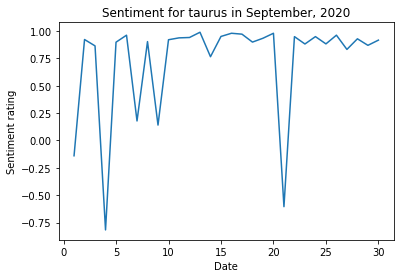

formatted_date
2020-09-04    The tricky things to balance today are your emotions and sense of duty, Taurus. Try not to let the stress of having to complete a task leak into your state of mind. The problem is that your emotions may be running away more quickly than you can handle. Meanwhile, there's a bit of a slowdown when it comes to your sense of duty and responsibility.
Name: horoscope, dtype: object
formatted_date
2020-09-13    Expect some positive changes in a current partnership, Taurus. If this is a business partnership, a new agreement between you shows promise of success and good fortune. If this is a romance, you might be so perfectly compatible that you're considering moving to the next level of commitment. Any new partnership begun today should be promising and bring you whatever you hope to gain.
Name: horoscope, dtype: object


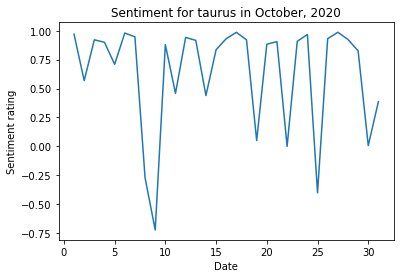

formatted_date
2020-10-09    You may want to remedy every situation by talking things out or taking some sort of action, Taurus. Be careful of making any sudden moves before you really understand what you're feeling. One minute you may be full of exuberance and ready to launch into a new project, but once you start moving forward, you're suddenly feeling insecure. Take this resistance as a sign that maybe this isn't the best time to move forward.
Name: horoscope, dtype: object
formatted_date
2020-10-27    Although you're usually very responsible and you try to keep the proper balance between your home and professional lives, today your mind and heart are more focused on your home, Taurus. A warm sense of unity with family and close friends could make for a very pleasant day and an even more pleasant evening. Even finishing up paperwork will seem easier than usual. Relax and enjoy a great evening.
Name: horoscope, dtype: object


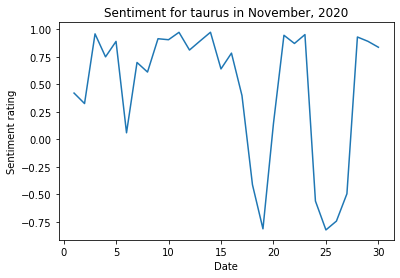

formatted_date
2020-11-25    Emotionally, things might get rather tense for you as others tend to demonstrate a selfish attitude, Taurus. Selfishness doesn't always have to be considered a negative. Sometimes it's healthy and necessary to take a more self-centered stance. You need to take care of yourself at all times. So, don't try to pick a fight when other people also demonstrate this behavior.
Name: horoscope, dtype: object
formatted_date
2020-11-14    Creativity and romance are the words for today, Taurus. Artistic or other creative projects are likely to catch the attention of others, perhaps bringing valuable contacts your way. As a result, you're likely to be inspired to move ahead to new ones. You're also likely to feel especially romantic and sexy. If you're currently involved, expect to grow closer to your partner. If you aren't, you might meet someone special.
Name: horoscope, dtype: object


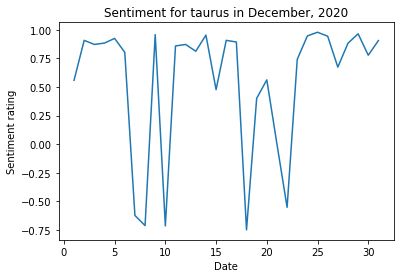

formatted_date
2020-12-18    Taurus, you tend to run away from confrontation, but today you might not be able to avoid it. Your partner or a family member may be putting pressure on you. It's possible you've already worked out a solution to this problem. Tell your partner what he or she wants to hear so you can do what you want later.
Name: horoscope, dtype: object
formatted_date
2020-12-25    You may not want to wander far from your bedroom today. That's fine. Take this opportunity to get things done around the house that make you feel like your energy is an important part of the atmosphere. Hang new pictures, read inspiring articles, and laugh at magazine cartoons that inspire your humorous side. Be soft and gentle with your words and actions. Just take it easy!
Name: horoscope, dtype: object


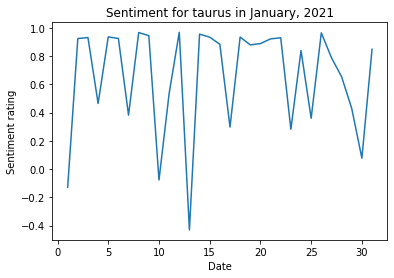

formatted_date
2021-01-13    Unfounded worries about money could plague you today, Taurus. Someone close may have given you some incorrect information, perhaps about your financial situation, but more likely regarding trends in the economy that could affect your finances. Don't waste time worrying. Check out the facts before driving yourself crazy. You will probably find that you've been misinformed.
Name: horoscope, dtype: object
formatted_date
2021-01-12    If you're currently romantically involved, expect your relationship to reach a new understanding and sense of unity, Taurus. If you aren't involved, you could meet someone special today, and it might be like love at first sight. An instant bond could form between you because of mutual intellectual interests. You might have a lot to talk about, as your own projects are going better than you'd hoped.
Name: horoscope, dtype: object


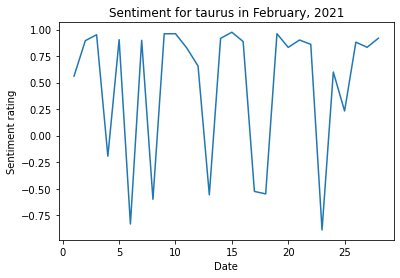

formatted_date
2021-02-23    You may feel insecure about your appearance today, Taurus. This can be a vicious cycle to get into. The result is almost always negative. Rather than pick yourself apart, consider finding ways to accept your looks. Whether it's your weight or age or anything else, if you can't accept yourself, you will always find something wrong no matter how many changes you make.
Name: horoscope, dtype: object
formatted_date
2021-02-15    You will be in an especially affectionate and loving mood today, Taurus. Your romantic nature is heightened and your nurturing qualities are strong. You're extra sensitive and receptive. You might find that you have no problem communicating your truest feelings to others. Connect with those you feel especially close to, and enjoy an intimate evening.
Name: horoscope, dtype: object


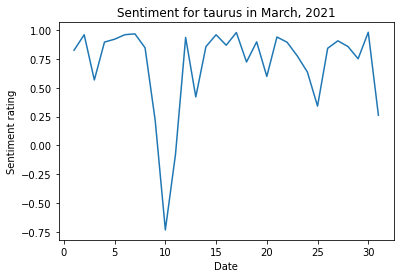

formatted_date
2021-03-10    A sudden but necessary expense could make a big hole in your budget today, Taurus. Perhaps some repairs need to be made around the house or to the car. Maybe someone needs an unexpected trip to the dentist. This could throw you off balance, but you can manage it by cutting some corners. So what if you have to eat pasta for a week or two? It could be worse! Just move ahead with whatever needs to be done.
Name: horoscope, dtype: object
formatted_date
2021-03-30    You might be extremely busy now. Invitations to large parties, small gatherings with close friends, and intimate evenings with romantic partners might come up today. Be discriminating in those you accept, Taurus. Concentrate on seeing people who share your interests. This may bring new friends your way, as well as opportunities to expand your horizons. Romance looks great now.
Name: horoscope, dtype: object


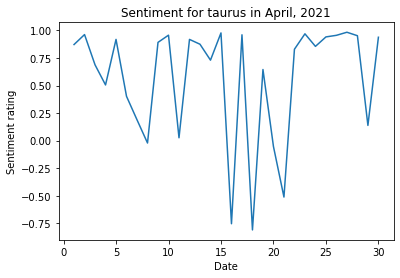

formatted_date
2021-04-18    Staying indoors might not be the best thing today, Taurus. You might feel vague muscular aches and pains for which you can't find any reason. They could be the result of inactivity rather than any dysfunction. Get outside and go for a walk or jog in the park. This will get the endorphins going and wipe away the memory of how you felt earlier. Have fun!
Name: horoscope, dtype: object
formatted_date
2021-04-27    Today everyone will notice how attractive, articulate, and charming you are, Taurus. This is an excellent time to invite friends over or go out with them. Romance should go particularly well. In the course of your conversations, you might become aware of some fascinating and useful information that sparks you on to new interests and possibly new opportunities. Hold onto them and take the next steps.
Name: horoscope, dtype: object


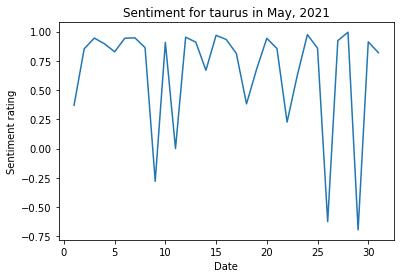

formatted_date
2021-05-29    Today a number of chores around the home could have you feeling overwhelmed, Taurus. Family members might abandon you, leaving you disgruntled. Do the most pressing and leave the rest for when they're home! There might be a difference of opinion between you and your mate. Try to see both sides of the issue and circumvent any serious disagreements.
Name: horoscope, dtype: object
formatted_date
2021-05-28    You feel confident. People can't help but notice as you radiate a loving, peaceful calm, Taurus. Eyes will turn your way, and complete strangers may come up to you and tell you how attractive you are. Be confident yet humble and you will inspire people just by your peaceful, glowing presence. Take advantage of this wonderful day by enjoying yourself for the beautiful person you are.
Name: horoscope, dtype: object


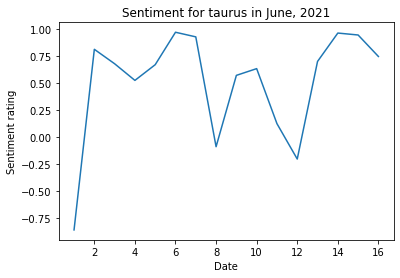

formatted_date
2021-06-01    Disturbing dreams or unsettling moods could arise today, causing you to wonder if something is wrong or something bad is going to happen. Let it go, Taurus. If anything goes wrong, it isn't likely to be anything major. A recent event may have triggered old impressions that are causing these feelings. You could also be picking up on others' moods, as your intuition is high.
Name: horoscope, dtype: object
formatted_date
2021-06-06    Taurus, you should feel physically strong and energetic today and ready to take on just about anything that comes your way. This is good, as you may be presented with some powerful challenges that bring new purpose to your life. Excitement and enthusiasm permeate your entire being right now. Anything that comes your way you're likely to face with determination, undeterred by the enormity of the task.
Name: horoscope, dtype: object


In [57]:
df['formatted_date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df.index = df['formatted_date']
df_grouped = df.groupby(pd.Grouper(freq='M'))

for g in df_grouped.groups:
    sentiment_by_month(df_grouped.get_group(g), g.month, g.year, 'taurus', 'general')